# Human Activity Recognization

In this project, I take the activity recognition dataset. The dataset includes sensor readings of 30 different individuals and the type of activity they were recorded for. Here, I'll use the dataset from Kaggle to classify various activities.

Train Data: https://raw.githubusercontent.com/kb22/Activity-Recognition-using-Machine-Learning/master/train.csv

Test Data: https://raw.githubusercontent.com/kb22/Activity-Recognition-using-Machine-Learning/master/test.csv

In [1]:
# Importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Getting the data, we have Training set and Validation test
validation= pd.read_csv('test.csv',index_col=0)
training= pd.read_csv('train.csv', index_col=0)

In [3]:
training.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X    ...     \
0         -0.923527         -0.934724    ...      
1         -0.957686         -0.943068    ...      
2         -0.977469         -0.938692    ...      
3         -0.989302         -0.938692    ...      
4         -0.990441         -0.942469    ...      

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  
0              0.179941             -0.058627        1  STANDING  
1              0.180289             -0.054317        1  STANDING  
2              0.180637             -0.049118        1  STANDING  
3              0.181935             -0.047663        1  STANDING  
4              0.185151             -0.043892        1  STANDING  

[5 rows x 563 columns]

From the data we can see, we dont have any need for Hypothesis generation, I can see that there are set of accelerometer and gyroscope sensor values for each record. Further, the last two columns are subject which refers to subject number and Activity which defines the type of activity. subject is of no use to us, so I can drop it safely. The Activity column acts as the label y and all the rest columns are features X. We thus calculate the features and labels for both training and testing data.

In [4]:
#Structure of data and null values check
print('Train data: {} and Null Values : {}'.format(training.shape, training.isnull().values.any()))
print('Validation data: {} and Null Values : {}'.format(validation.shape, validation.isnull().values.any()))

Train data: (7352, 563) and Null Values : False
Validation data: (2947, 563) and Null Values : False


No Missing Values so no need for imputation.

In [49]:
# Separating Dependent and Independent Variable
y= training['Activity']
x= training.drop(['subject','Activity'], axis=1)

# Get X and y for testing data
y_test = validation['Activity']
X_test = validation.drop(columns = ['Activity', 'subject'], axis=1)

Visulaizing the data using bar plot, and pie chart

One of the key things when working with data is to ensure that all classes are of approximately equal size. This is essential so that the machine learning algorithm is not biased towards any one class.


Say, the dataset is of 30 activities with varied share percentage. The dataset has 99% data for Activity 1 and 1% data for the remaining activities. In such a case, machine learning will never learn any pattern about the data. It’ll consider that for 99 out of 100 cases, the activity will be Activity 1. So, it’ll always output Activity 1 without any consideration for the data and will still achieve 99% accuracy. Such a model is incorrect and thus approximately equal share of different data classes must be ensured.

In [18]:
count_of_each_activity = np.array(y.value_counts())
activities = sorted(y.unique())

<BarContainer object of 6 artists>

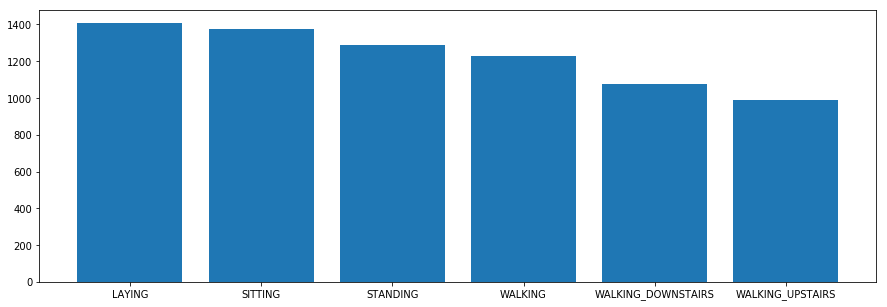

In [19]:
plt.figure(figsize=[15,5])
plt.bar(activities,count_of_each_activity)

([<matplotlib.patches.Wedge at 0x1196aec88>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511825, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.245384163900645, '13.41')])

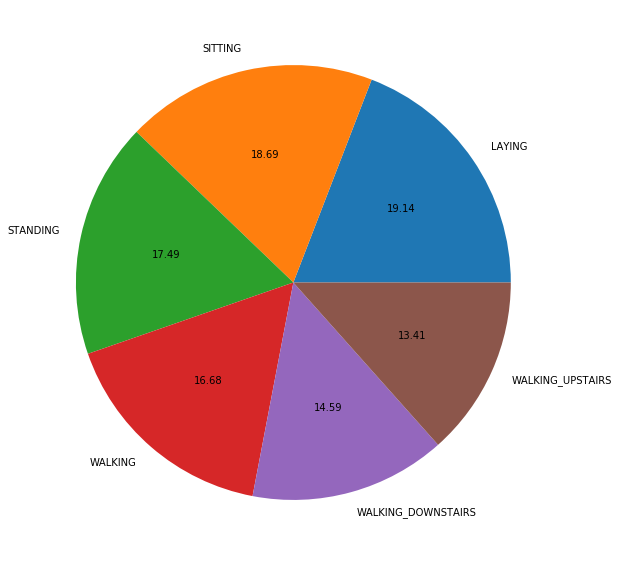

In [20]:
plt.figure(figsize=[10,10])
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

The percenage values show that the data size for each activity is comparable. The dataset is equally distributed and will prevent bias.

Next, on inspecting the dataset, we can see that there are many features. It's easy to identify that there are Accelerometer, Gyroscope and some other values in the dataset. We can check the share of each by plotting a bar graph of each type. Accelerometer values have Acc in them, Gyroscope values have Gyro and rest can be considered as others.

In [21]:
training.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

<BarContainer object of 3 artists>

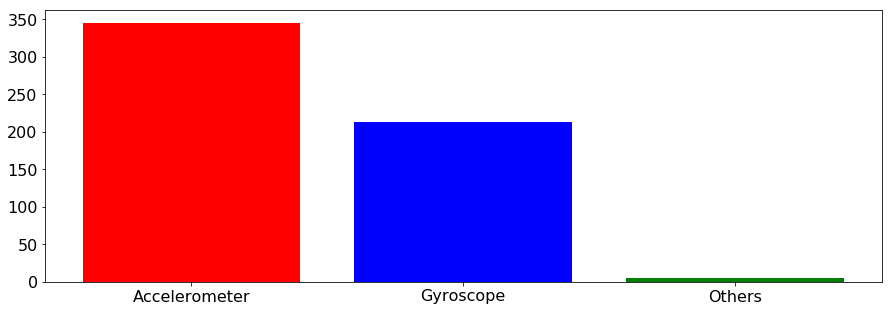

In [25]:
acc=0
gyro=0
other=0
for i in training.columns:
    if 'Acc' in str(i):
        acc+=1
    elif 'Gyro' in str(i):
        gyro+=1
    else:
        other+=1
        

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [15, 5], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, other], color = ('r', 'b', 'g'))

### Inspect a particular activity


To get a better perspective on the data, I understood that I had to take a look at the activities. Thus, I decided that I’ll try to explore more about the ‘Standing’ activity.

This is all the information I knew before I began:

The dataset has activity records for 30 individuals and some individual performed the Standing activity.

The data collected is recorded at a stretch for each individual, especially for each activity. This means the records of any given activity will actually be in time series.

There are many features in each record, but I must not include all in one attempt as it might make the understanding of the data more difficult.


Based on the information I had, I decided that I’d plot a line graph for all individuals who performed the Standing activity over a time period with respect to a feature. I took the feature as the angle between X and mean Gravity, which should stay almost constant except for minor changes due to human error.


In [35]:
# selecting all rows from the dataset that have the ‘Activity’ label as ‘STANDING’ and store it in standing_activity

standing_activity= training.loc[training['Activity']=='STANDING',:]

In [36]:
#Reseting the index as we reset the index. This is necessary because when we selected the above rows, 
# the removed rows did get removed but the remaining rows’
# index did not change and they were no longer in a continuous order
standing_activity.reset_index(drop=True,inplace=True)

The data collected is in continuous time series for each individual and was recorded at the same rate. So, I can simply assign time values to each activity starting from 0 each time the subject changes. For each subject, the Standing activity records will start with a time value of 0 and increment by 1 till the previous row’s subject matches the present row’s subject.

In [37]:
# Set time series for each subject
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

In [44]:
time= pd.DataFrame({'Time':time_series})

In [45]:
standing_diff= pd.concat([standing_activity,time], axis=1)

In [46]:
standing_diff.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...   angle(tBodyAccMean,gravity)  \
0         -0.923527         -0.934724  ...                     -0.112754   
1         -0.957686         -0.943068  ...                      0.053477   
2         -0.977469         -0.938692  ...                     -0.118559   
3         -0.989302         -0.938692  ...                     -0.036788   
4         -0.990441         -0.942469  ...                      0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  Time  
0              0.179941             -0.058627        1  STANDING   1.0  
1              0.180289             -0.054317        1  STANDING   2.0  
2              0.180637             -0.049118        1  STANDING   3.0  
3              0.181935             -0.047663        1  STANDING   4.0  
4              0.185151             -0.043892        1  STANDING   5.0  

[5 rows x 564 columns]

 I use the matplotlib’s cm subpackage to get a list of colors using the rainbow method.
 
I then iterate over the list of subjects inside the standing_activity_df. I specify size of the graph using rcParams. In the plot method, the first argument is X-axis values which is Time column in our case. The second column is for Y-axis values so I input the angle(X, gravityMean) values. Color is defined in c, subject numbers are set as label and width of the line is set to 4 in linewidth. I then specify the X-axis label, Y-axis label and title for the plot. legend() method displays the legend on the graph.


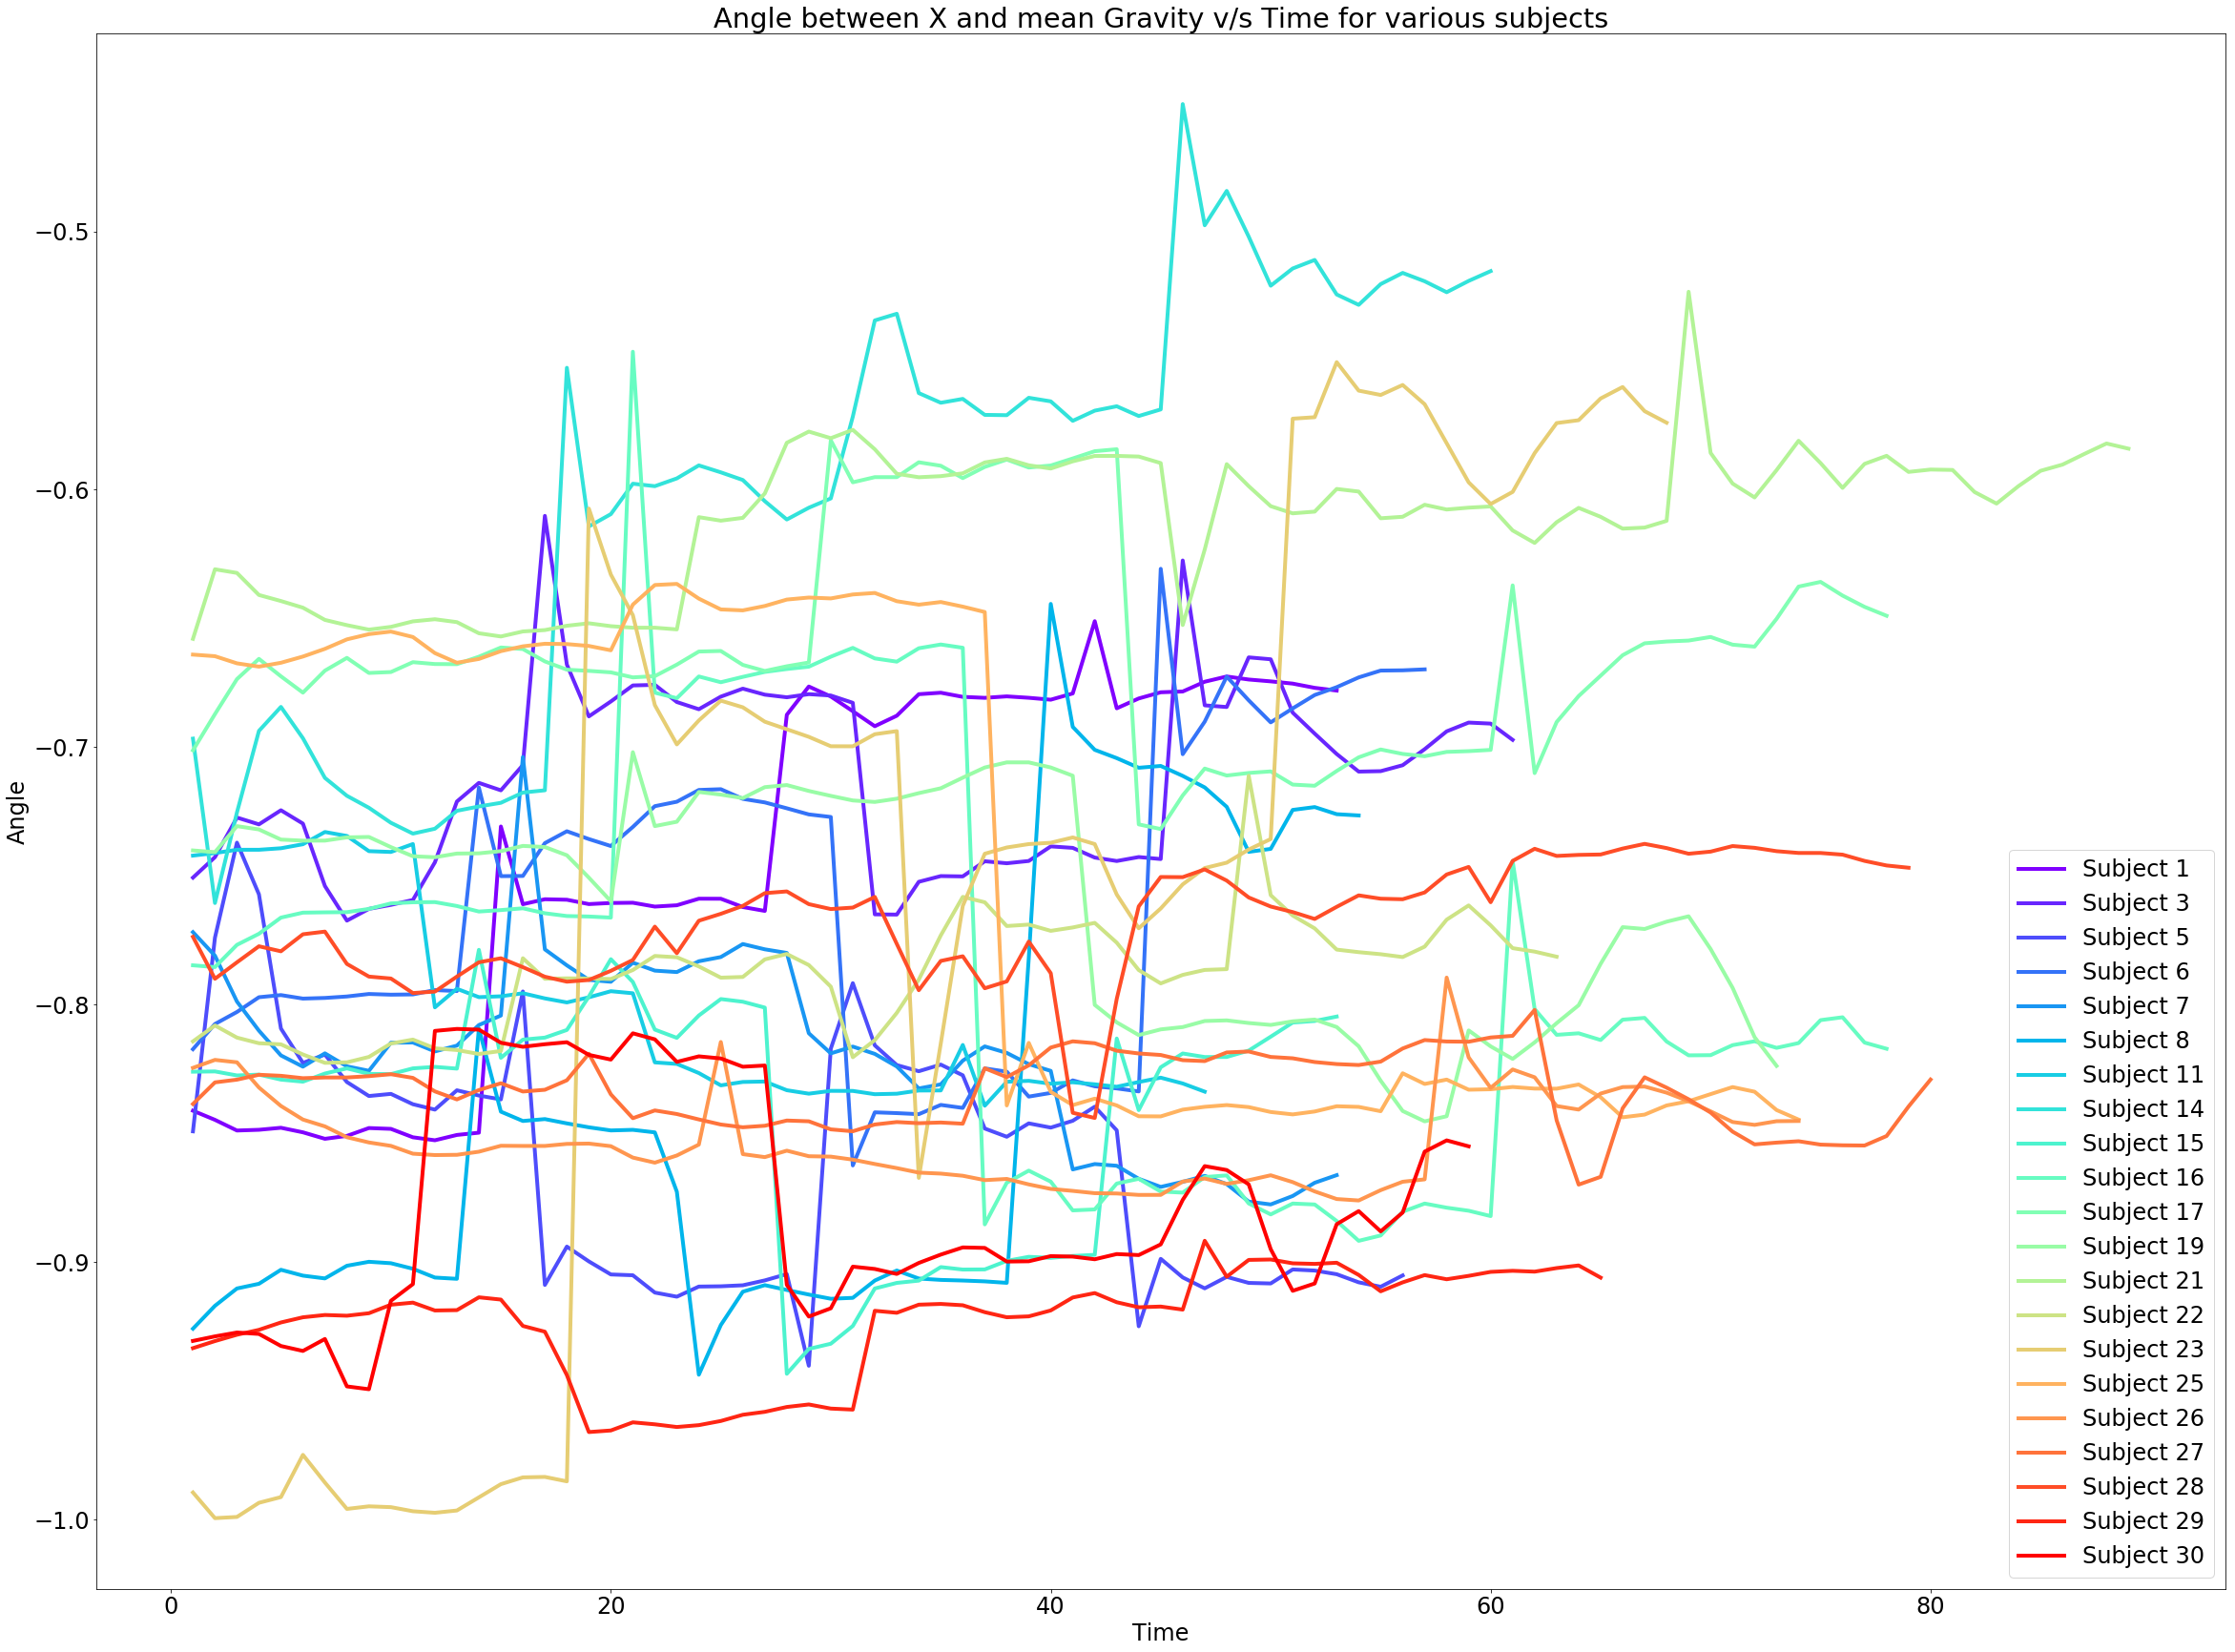

In [48]:
import matplotlib.cm as cm


colors = cm.rainbow(np.linspace(0, 1, len(standing_diff['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_diff['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_diff[standing_diff['subject'] == subject]['Time'], 
             standing_diff[standing_diff['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

If we take a closer look at the graph, we can see that each line on an average, transitions between a maximum range of 0.2–0.3 values. This is indeed the expected behaviour as slight variations can be attributed to minor human errors.

### Model Building

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC(gamma='auto').fit(x, y)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(multi_class='auto').fit(x, y)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(x, y)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier(n_estimators=25).fit(x, y)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Support Vector Classifier accuracy: 94.02782490668477%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 96.19952494061758%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 91.92399049881234%


Text(0.5, 1.0, 'Accuracy of various algorithms')

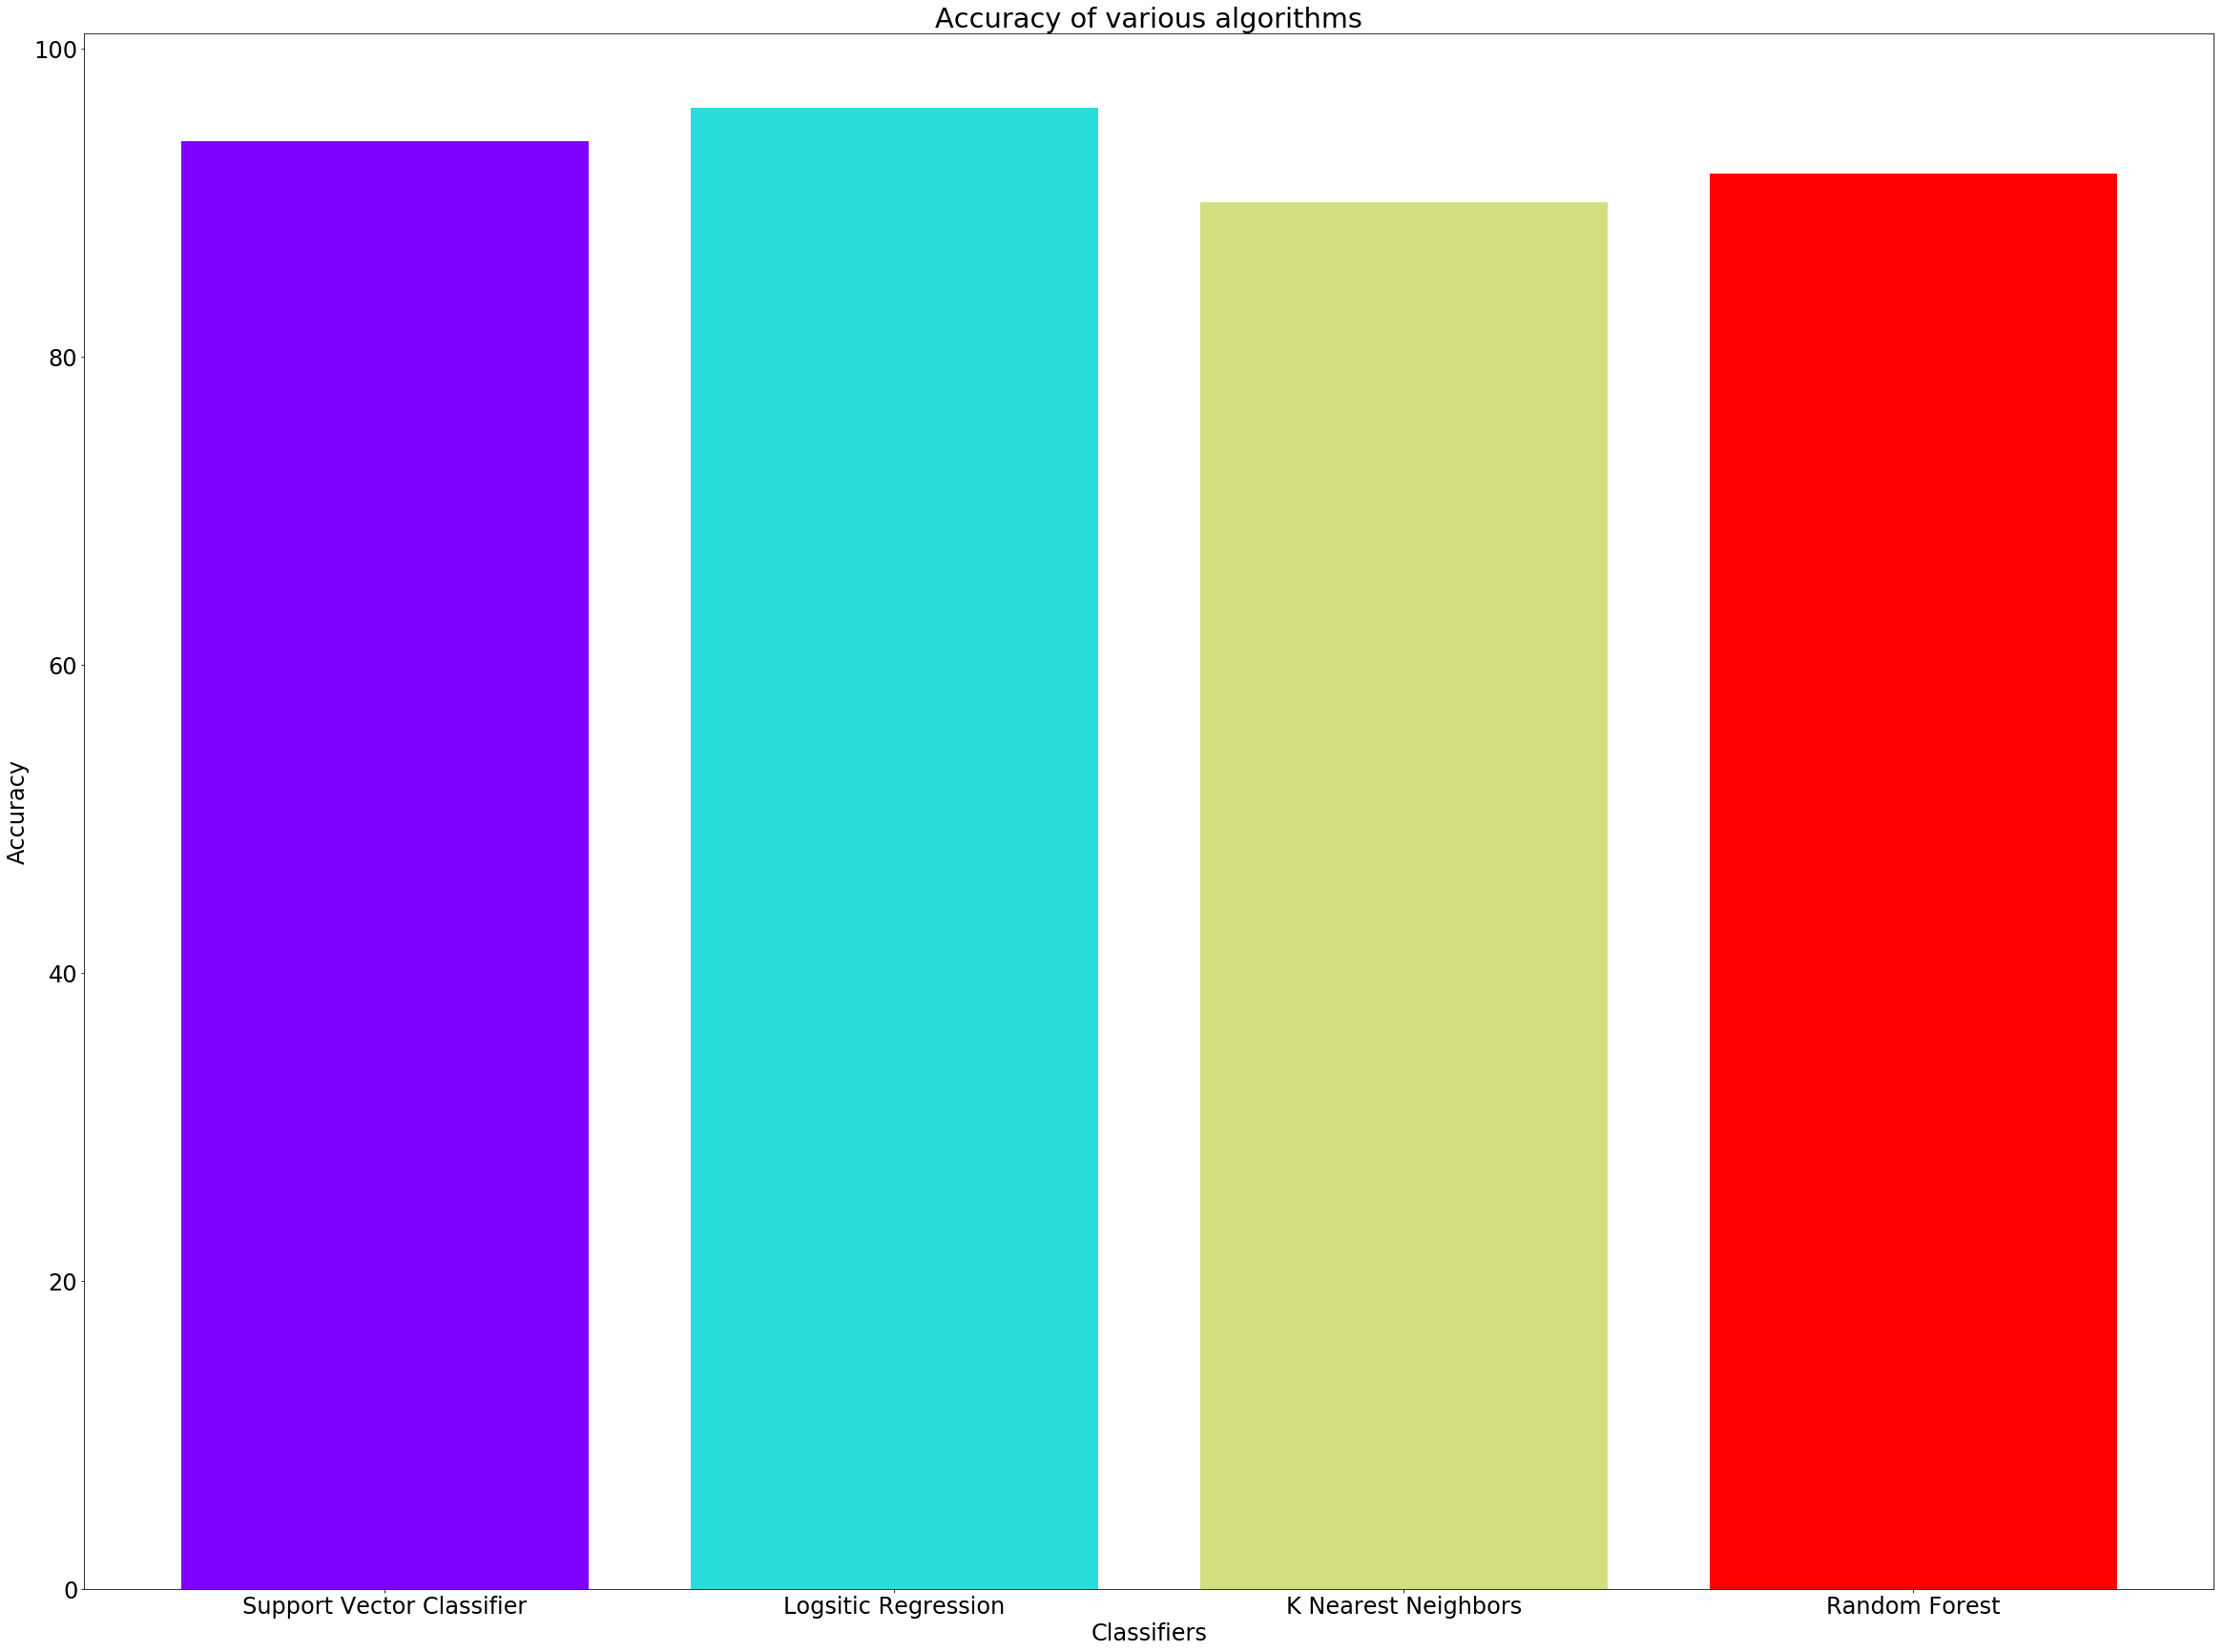

In [52]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')